In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import SMOTE

In [3]:
data=pd.read_csv(r"C:\Users\SANDEEP RAWAT\Downloads\train_LZdllcl.csv")
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
# Checking for duplicate values

data[data.duplicated()==True]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


In [6]:
#Checking for Missing Values

data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
# Checking if my Hypothesis: Blank values in previous_year_training are those of freshers, is correct

data[data.previous_year_rating.isnull()].length_of_service.unique()
data.previous_year_rating = data.previous_year_rating.fillna("0").astype("int")

In [8]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
# imputer=SimpleImputer(strategy="most_frequent")
# data.education = imputer.fit_transform(data[['education']])

#Backfilling and forward filling since we are assuming the data was collected in the order
data["education"] = data["education"].ffill(axis = 0)
data["education"] = data["education"].bfill(axis = 0)

In [10]:
# Check if there is may column with unique values only (0 variance)

data.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,54808.0,3.078748,1.496458,0.0,2.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [11]:
# Droping the employee_id column since it wont contribute to thr analysis

data.drop(columns="employee_id", inplace=True)

In [12]:
# Checking if the Data is Imbalanced
 
data.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

<Axes: >

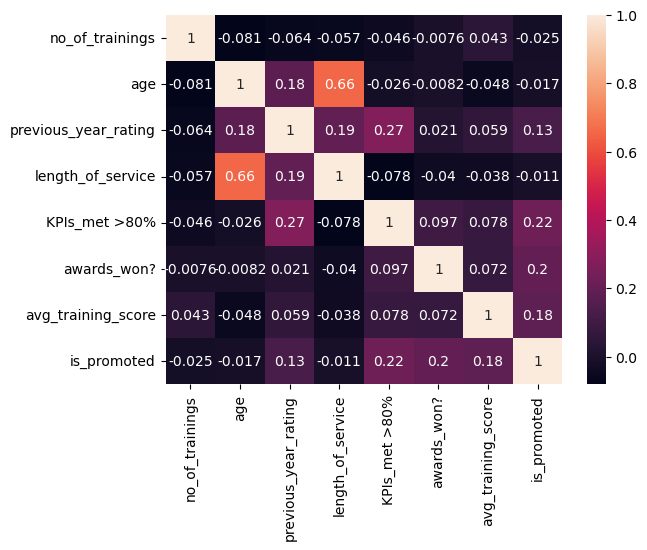

In [13]:
# Checking for realtions between variables

sns.heatmap(data.select_dtypes("int").corr(), annot=True)


C:\Users\SANDEEP RAWAT\AppData\Local\Temp\ipykernel_28492\1054706825.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


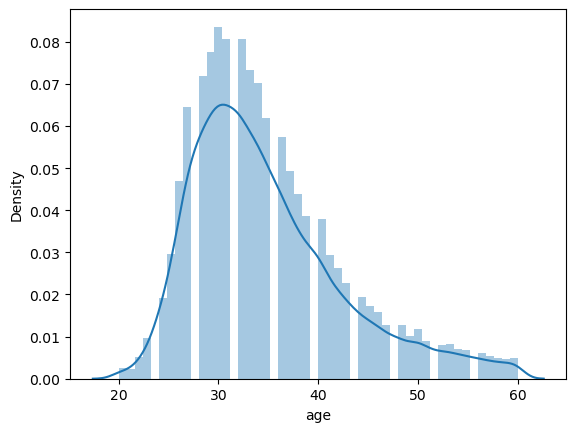

In [14]:
sns.distplot(data.age)

#Binning the age data
data['age'] = pd.cut( x=data['age'], bins=[20, 29, 39, 49], labels=['20', '30', '40'] )

In [16]:
# Encoding of variables

col = [ "region", "age","department", "education", "gender", "recruitment_channel" ]
encod_var = pd.get_dummies(data.loc[:,[ "region", "age","department", "education", "gender", "recruitment_channel" ]], drop_first=True)
data = pd.concat([data, encod_var], axis=1)
data.drop(columns=col, inplace=True)
data

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,region_region_10,region_region_11,region_region_12,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,5,8,1,0,49,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,1,5,4,0,0,60,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,3,7,0,0,50,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,2,1,10,0,0,50,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,3,2,0,0,73,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1,3,17,0,0,78,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
54804,1,2,6,0,0,56,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
54805,1,5,3,1,0,79,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
54806,1,1,2,0,0,45,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [19]:
# Splitting the data into train and test

y=data.pop("is_promoted")
X=data
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.2,random_state=42)

In [20]:
# Checking the distribution of classes in equal in both test and train

train_y.value_counts(normalize=True)

0    0.914245
1    0.085755
Name: is_promoted, dtype: float64

In [21]:
test_y.value_counts(normalize=True)

0    0.917168
1    0.082832
Name: is_promoted, dtype: float64

In [22]:
# Since our data was imbalanced, we'll balance it out using SMOTE over-sampling method
# Didnt work with this dataset

# sm=SMOTE()
# X_res, y_res = sm.fit_resample(train_x, train_y)

In [23]:
# y_res.value_counts()

In [25]:
# Scaling the data --- Robust Scaler, since its good with outliers

scaler=RobustScaler()
train_x=scaler.fit_transform(train_x)
test_x=scaler.transform(test_x)

In [27]:
# Since our data was imbalanced, we will be assigning respective weights to include some balance.

lr=LogisticRegression(class_weight={0:0.1,1:0.9})
lr.fit(train_x, train_y)

C:\Users\SANDEEP RAWAT\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_pred = lr.predict(test_x)

In [29]:
f1_score(test_y, y_pred)

0.36815068493150693

In [31]:
weights = np.linspace(0.0,0.99,500)
param= {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1', 'l2'],"class_weight":[{0:x ,1:1.0 -x} for x in weights]}
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

model= GridSearchCV(estimator= lr,param_grid=param,scoring="f1",cv=folds,return_train_score=True, n_jobs=-1)
model.fit(train_x, train_y)

C:\Users\SANDEEP RAWAT\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15000 fits failed out of a total of 30000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SANDEEP RAWAT\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SANDEEP RAWAT\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 10, 15, 20],
                         'class_weight': [{0: 0.0, 1: 1.0},
                                          {0: 0.0019839679358717435,
                                           1: 0.9980160320641283},
                                          {0: 0.003967935871743487,
                                           1: 0.9960320641282565},
                                          {0: 0.0059519038076152305,
                                           1: 0.9940480961923848},
                                          {0: 0.007935871743486974,
                                           1: 0.9...
                                           1: 0.9543687374749499},
                                          {0: 0.047615230460921844,
                                           1: 0.9523847695390781},
                                          {0: 0.04959919839679359,
                                           1: 0.9504008016032064},
                                          {0: 0.05158316633266533,
                                           1: 0.9484168336673346},
                                          {0: 0.05356713426853708,
                                           1: 0.9464328657314629},
                                          {0: 0.055551102204408814,
                                           1: 0.9444488977955912},
                                          {0: 0.05753507014028056,
                                           1: 0.9424649298597194}, ...],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='f1')

In [32]:
print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.4435198943317699
Best hyperparameters:  {'C': 20, 'class_weight': {0: 0.27973947895791584, 1: 0.7202605210420842}, 'penalty': 'l2'}


In [34]:
# Building the model with updated parameters

lr2=LogisticRegression(class_weight={0:0.27,1:0.73},C=20,penalty="l2")
lr2.fit(train_x, train_y)

C:\Users\SANDEEP RAWAT\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=20, class_weight={0: 0.27, 1: 0.73})

In [41]:
#probabilities of the outcome
y_pred_prob_test = lr2.predict_proba(test_x)[:, 1]

#predict labels on test dataset
y_pred_test = lr2.predict(test_x)

cm = confusion_matrix(test_y, y_pred_test)
print("confusion Matrix is :nn",cm)
print("n")

# ROC- AUC score
print("ROC-AUC score  test dataset:  t", roc_auc_score(test_y,y_pred_prob_test))

#Precision score
print("precision score  test dataset:  t", precision_score(test_y,y_pred_test))

#Recall Score
print("Recall score  test dataset:  t", recall_score(test_y,y_pred_test))

#f1 score
print("f1 score  test dataset :  t", f1_score(test_y,y_pred_test))

confusion Matrix is :nn [[9599  455]
 [ 525  383]]
n
ROC-AUC score  test dataset:  t 0.8799797174552572
precision score  test dataset:  t 0.45704057279236276
Recall score  test dataset:  t 0.42180616740088106
f1 score  test dataset :  t 0.43871706758304696
